In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

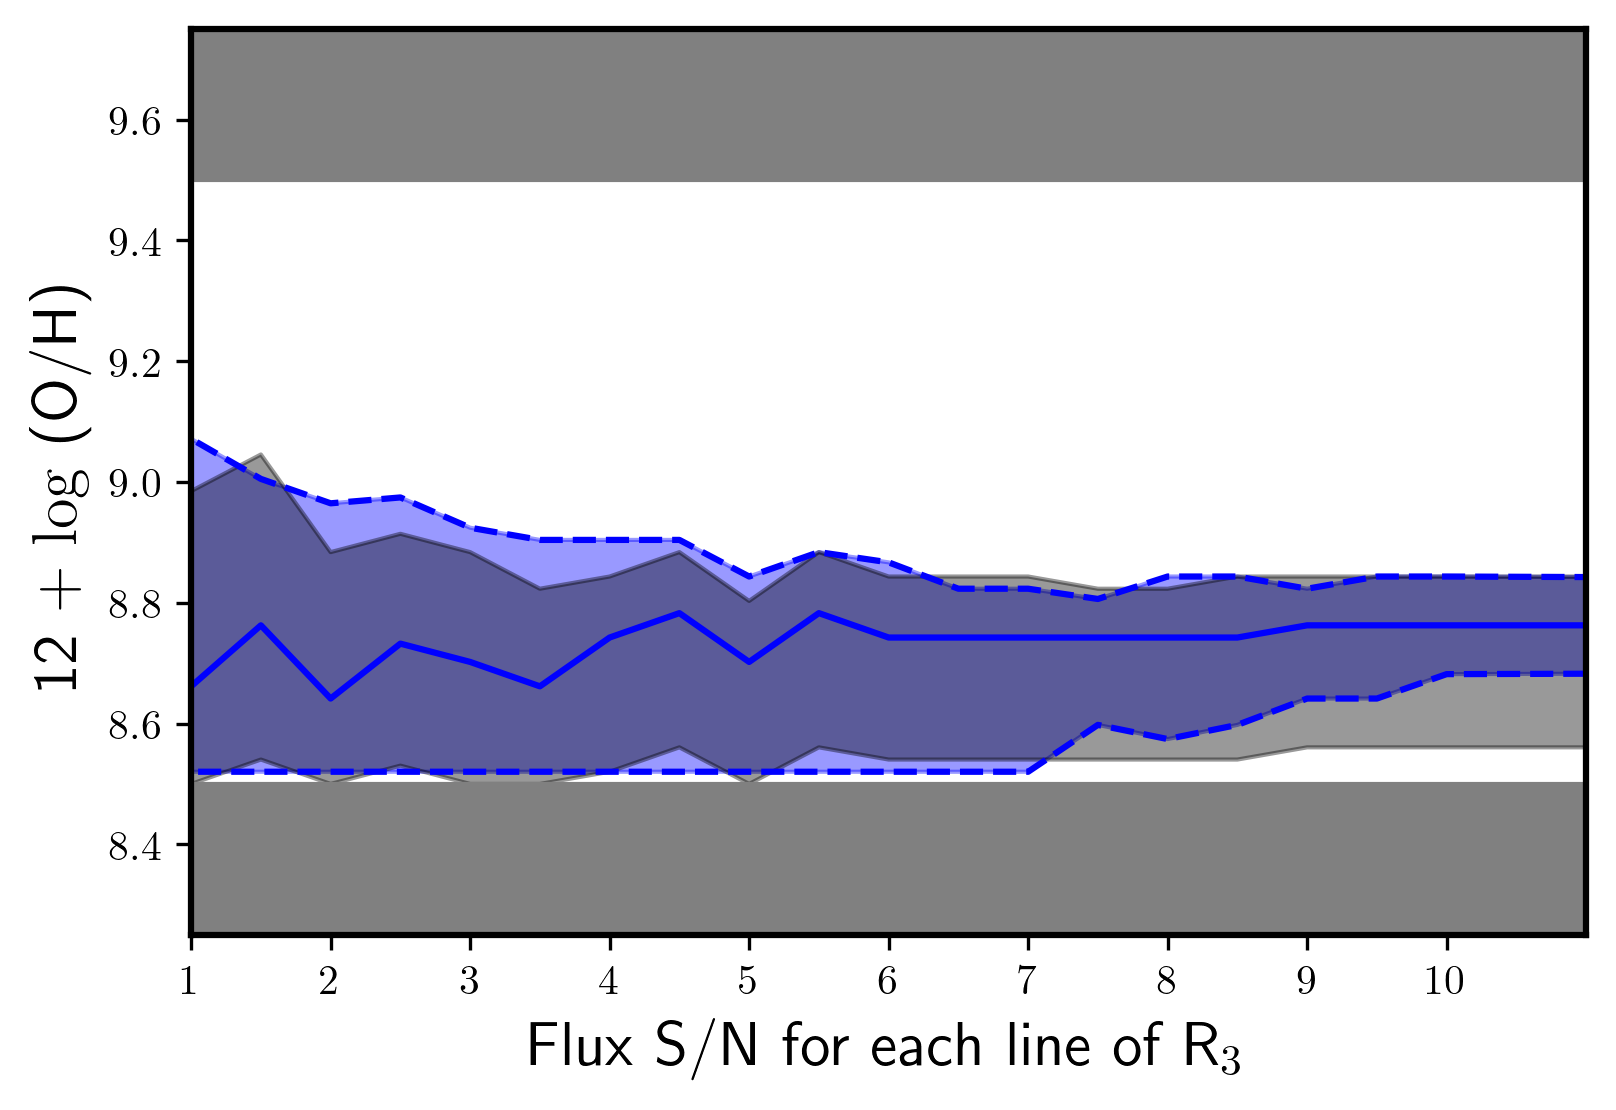

In [17]:
test= 'Z88'
run = 'R3'
Z = np.load('izi_SN_%s_%s.npy'%(test, run), allow_pickle = True)[()]
fig, ax = plt.subplots(1,1, facecolor = 'white')


case = 'case1'
SNs = Z[case].keys()
p05s = []
p16s = []
p50s = []
p84s = []
p95s = []

ues = []
les = []

for SN in SNs:
    Zmd = np.array(Z[case][SN]['Zmd'])
    Zmd = Zmd[~np.isnan(Zmd)]
    p05, p16, p50, p84, p95 = np.percentile(Zmd, [5, 16, 50, 84, 95])    
    #ax.errorbar(SN, p50, yerr = (p50-p05, p95-p50)], color = 'black', fmt = 'o')
    p05s.append(p05)
    p16s.append(p16)
    p50s.append(p50)
    p84s.append(p84)
    p95s.append(p95)
    
    ues.append(np.nanmedian(Z[case][SN]['Zue']))
    les.append(np.nanmedian(Z[case][SN]['Zle']))

ues = np.array(ues)
les = np.array(les)
p50s = np.array(p50s)
    

ax.plot(SNs, p50s, color = 'blue', linestyle = '-')
ax.plot(SNs, p16s, color = 'blue', linestyle = '--')
ax.plot(SNs, p84s, color = 'blue', linestyle = '--')
#ax.plot(SNs, p05s, color = 'lightblue', linestyle = '--')
#ax.plot(SNs, p95s, color = 'lightblue', linestyle = '--')
ax.fill_between(SNs, p16s, p84s, alpha = 0.4, color = 'blue')
ax.fill_between(SNs, p50s - les, p50s + ues, alpha = 0.4, color = 'black')

#ax.fill_between(SNs, p05s, p16s, alpha = 0.2, color = 'blue')
#ax.fill_between(SNs, p84s, p95s, alpha = 0.2, color = 'blue')
    
    
fig.set_dpi(300)
ax.set_ylim(8.25, 9.75)
ax.axhspan(ymin = 9.5, ymax = 10.0, color = 'grey')
ax.axhspan(ymin = 8.0, ymax = 8.5, color = 'grey')

#ax.annotate('Prior bounds', (0, 8.4), xycoords = 'data', ha = 'left', va = 'center')
ax.set_xticks(np.arange(11))
ax.set_xlim(1.0, 11)

ax.set_ylabel('12 + $\log$ (O/H)', fontsize = 15)
ax.set_xlabel('Flux S/N for each line of R$_{3}$', fontsize = 15)
fig.savefig('izi_SN_%s_%s.png'%(test,run), transparent = False)
#ax.axhline(y =  np.median(Z['case1'][100.0]['Zmd']), color = 'grey')

In [83]:
p05

8.762706756591797

In [3]:
matplotlib.get_cachedir()

'/Users/rsimons/.matplotlib'